<a href="https://colab.research.google.com/github/parvvaresh/Credit-Card-Fraud-Detection/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import library and tools


*   pandas
*   numpy
*   sklearn :
      *   make_classification
      *   confusion_matrix and ConfusionMatrixDisplay
      *   train_test_split
      *   accuracy_score
      *   LogisticRegression
      *   KMeans
      *   SVC
      *   MinMaxScaler
      *   classification_report

*  seoborn
*  matplotlib.pyplot

  





In [ ]:
#for clear cash output for this note book
from google.colab import output

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from joblib import Parallel, delayed
import joblib


from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.cluster import KMeans

#conect to google drive
from google.colab import drive
drive.mount('/content/drive')

#for ignore warning python
import warnings
warnings.filterwarnings("ignore")

output.clear()

# add and read data

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Ai/data/creditcard.csv")
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# see number of rows and columns this data sets

In [ ]:
f"number of row : {df.shape[0]} and number of columns : {df.shape[1]}"

'number of row : 284807 and number of columns : 31'

# see info of data sets by 'name_data.info()' method

* what is info ?

The output will include information about the DataFrame, such as the data types of each column, the number of non-null values, and memory usage.



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# see describe of data sets by 'name_data.describe()' method

* what is describe ?

In pandas, the describe() method is used to generate descriptive statistics of a DataFrame or Series. It provides a summary of the central tendency, dispersion, and shape of the distribution of a dataset. For a DataFrame, it computes statistics for each numerical column, such as count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum.

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# label counts

We do this because we want to see if the data balance is maintained for each class or not

## see the tables

In [ ]:
labels_count = pd.DataFrame(df["Class"].value_counts())
labels_count.T

,0,1
Class,284315,492


## see the plot

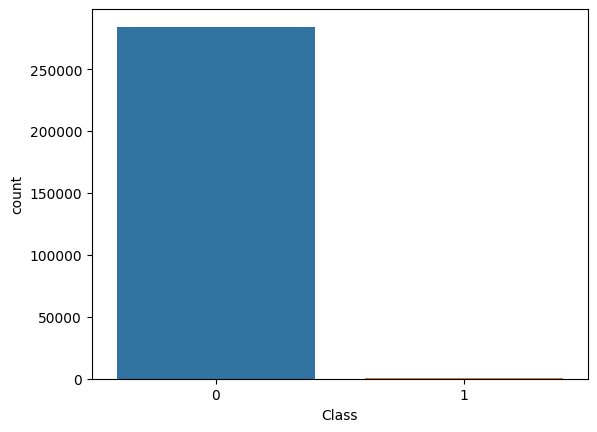

In [ ]:
sns.countplot(x='Class', data=df);

You can see that the data label is not balanced at all and this problem must be solved

# find of range the features

## Implementation

In [ ]:
def find_range(df):
  for col in df.columns:
    print(f"this {col} range of : --> {min(df[col])} - {max(df[col])}")

## see the result

In [ ]:
find_range(df)

this Time range of : --> 0.0 - 172792.0
this V1 range of : --> -56.407509631329 - 2.45492999121121
this V2 range of : --> -72.7157275629303 - 22.0577289904909
this V3 range of : --> -48.3255893623954 - 9.38255843282114
this V4 range of : --> -5.68317119816995 - 16.8753440335975
this V5 range of : --> -113.743306711146 - 34.8016658766686
this V6 range of : --> -26.1605059358433 - 73.3016255459646
this V7 range of : --> -43.5572415712451 - 120.589493945238
this V8 range of : --> -73.2167184552674 - 20.0072083651213
this V9 range of : --> -13.4340663182301 - 15.5949946071278
this V10 range of : --> -24.5882624372475 - 23.7451361206545
this V11 range of : --> -4.79747346479757 - 12.0189131816199
this V12 range of : --> -18.6837146333443 - 7.8483920756446
this V13 range of : --> -5.79188120632084 - 7.12688295859376
this V14 range of : --> -19.2143254902614 - 10.5267660517847
this V15 range of : --> -4.49894467676621 - 8.87774159774277
this V16 range of : --> -14.1298545174931 - 17.315111517

# Data preparation

## balance the label

In [ ]:
temp = df.copy()

df = pd.DataFrame()

gb = temp.groupby(['Class'])


min_size = 492
for label in set(temp["Class"]):
  cash = gb.get_group(label).head(min_size)
  df = df.append(cash, ignore_index=True)

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### label counts

We do this because we want to see if the data balance is maintained for each class or not.

#### see the tables

In [ ]:
labels_count = pd.DataFrame(df["Class"].value_counts())
labels_count.T

,0,1
Class,492,492


#### see the plot

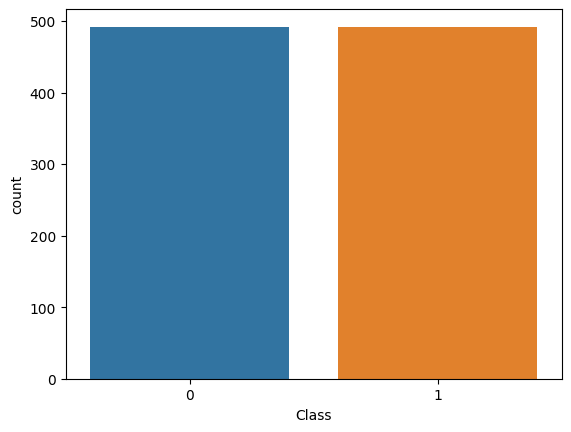

In [ ]:
sns.countplot(x='Class', data=df);

## split to test and train

detail :
*   80% for train
*   20% for test

In [ ]:
x = df.drop(['Class'], axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
     x , y, test_size=0.2, random_state=42)

### see the size of this

In [ ]:
print(f"(x_train) number of row : {X_train.shape[0]} and number of columns : {X_train.shape[1]}")
print(f"(X_test) number of row : {X_test.shape[0]} and number of columns : {X_test.shape[1]}")

(x_train) number of row : 787 and number of columns : 30
(X_test) number of row : 197 and number of columns : 30


## normalize

We take the range of numbers between zero and one

In [ ]:
scaler = MinMaxScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)

scaler.fit(X_test)
X_test = scaler.transform(X_test)

### see the result for x-train

In [ ]:
find_range(pd.DataFrame(X_train))

this 0 range of : --> 0.0 - 1.0
this 1 range of : --> 0.0 - 1.0
this 2 range of : --> 0.0 - 1.0
this 3 range of : --> 0.0 - 0.9999999999999999
this 4 range of : --> 0.0 - 1.0
this 5 range of : --> 0.0 - 1.0
this 6 range of : --> 0.0 - 0.9999999999999999
this 7 range of : --> 0.0 - 1.0
this 8 range of : --> 0.0 - 0.9999999999999999
this 9 range of : --> 0.0 - 1.0
this 10 range of : --> 0.0 - 1.0
this 11 range of : --> 0.0 - 1.0
this 12 range of : --> 0.0 - 1.0
this 13 range of : --> 0.0 - 1.0
this 14 range of : --> 0.0 - 0.9999999999999999
this 15 range of : --> 0.0 - 1.0
this 16 range of : --> 0.0 - 1.0
this 17 range of : --> 0.0 - 1.0
this 18 range of : --> 0.0 - 1.0
this 19 range of : --> 0.0 - 1.0
this 20 range of : --> 0.0 - 0.9999999999999999
this 21 range of : --> 0.0 - 1.0
this 22 range of : --> 0.0 - 1.0
this 23 range of : --> 0.0 - 1.0
this 24 range of : --> 0.0 - 1.0
this 25 range of : --> 0.0 - 1.0
this 26 range of : --> 0.0 - 1.0
this 27 range of : --> 0.0 - 1.0
this 28 ran

### see the result for x-test

In [ ]:
find_range(pd.DataFrame(X_test))

this 0 range of : --> 0.0 - 1.0
this 1 range of : --> 0.0 - 0.9999999999999999
this 2 range of : --> 0.0 - 1.0
this 3 range of : --> 0.0 - 1.0
this 4 range of : --> 0.0 - 1.0
this 5 range of : --> 0.0 - 1.0
this 6 range of : --> 0.0 - 1.0
this 7 range of : --> 0.0 - 0.9999999999999999
this 8 range of : --> 0.0 - 1.0
this 9 range of : --> 0.0 - 0.9999999999999999
this 10 range of : --> 0.0 - 1.0
this 11 range of : --> 0.0 - 1.0
this 12 range of : --> 0.0 - 1.0
this 13 range of : --> 0.0 - 1.0
this 14 range of : --> 0.0 - 1.0
this 15 range of : --> 0.0 - 1.0
this 16 range of : --> 0.0 - 1.0
this 17 range of : --> 0.0 - 1.0
this 18 range of : --> 0.0 - 1.0
this 19 range of : --> 0.0 - 0.9999999999999999
this 20 range of : --> 0.0 - 1.0
this 21 range of : --> 0.0 - 0.9999999999999998
this 22 range of : --> 0.0 - 0.9999999999999998
this 23 range of : --> 0.0 - 1.0
this 24 range of : --> 0.0 - 1.0
this 25 range of : --> 0.0 - 0.9999999999999999
this 26 range of : --> 0.0 - 0.9999999999999999

#  models




*   LogisticRegression
*   SVM
*   K-means


#### Duplicate functions are already implemented

#####  implementing for confusion matrix

In [ ]:
def conf_matrix(y_pred, y_test, model = None):
  conf_matrix =  confusion_matrix(y_pred, y_test)

  fig, ax = plt.subplots(figsize=(5,5), dpi=100)
  display = ConfusionMatrixDisplay(conf_matrix, display_labels=model.classes_)
  ax.set(title='Confusion Matrix for the Diabetes Detection Model')
  display.plot(ax=ax);

#####  implementing for plot for each vectorize

In [ ]:
def plot_for_each_vec(models, title):
  plots = sns.barplot(x = list(models.keys()), y = list(models.values()))
  plots.set_xticklabels(plots.get_xticklabels(),rotation = 45)
  plt.title(title)


  for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                    (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                    size=15, xytext=(0, 8),
                    textcoords='offset points')



## Logstic regression

### test and train and see accuracy

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
accuracy_lr = accuracy_score(lr_pred, y_test)
print(f"accuracy for Logistic Regression model {accuracy_lr * 100}")

accuracy for Logistic Regression model 97.96954314720813


### see the Confusion matrix

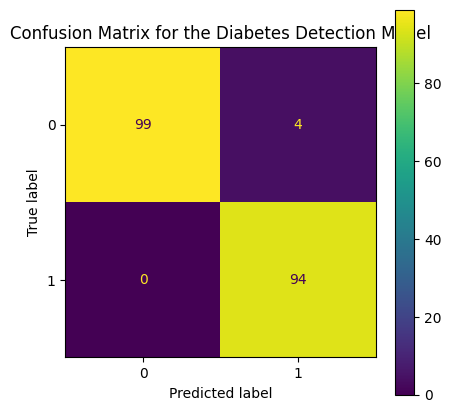

In [ ]:
conf_matrix(lr_pred, y_test, lr_model)

### classification of report

In [ ]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        99
           1       1.00      0.96      0.98        98

    accuracy                           0.98       197
   macro avg       0.98      0.98      0.98       197
weighted avg       0.98      0.98      0.98       197




### explian about evalovate metrics :  


* precision:

  * Non-counterfeit cards:

      96% means that 96% of the cards that were recognized as non-fraudulent cards were correct.

  * Counterfeit cards:

      100% means that 100% of the cards detected as fake cards were correct.


* recall:

  * Non-counterfeit cards:

    This is one hundred percent. All non-counterfeit cards that have been recognized as correct in Dagan's collection.

  * Counterfeit cards:

    It is 96 percent. 96% of the fake cards that were correctly recognized in the database.



Now, both qualities are the same here, and for the purpose of the system, for this reason, we use f1-score quality, which is equal to 98% here.

## Support Vector Machines


### test and train and see accuracy

In [ ]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
accuracy_svm = accuracy_score(svm_pred, y_test)
print(f"accuracy for SVM model {accuracy_svm}")

accuracy for SVM model 0.9898477157360406


### see the Confusion matrix

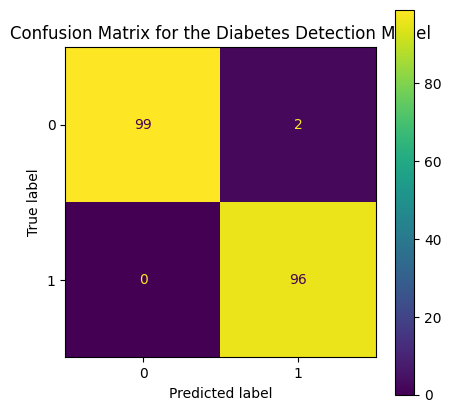

In [ ]:
conf_matrix(svm_pred, y_test, svm_model)

### classification of report

In [ ]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        99
           1       1.00      0.98      0.99        98

    accuracy                           0.99       197
   macro avg       0.99      0.99      0.99       197
weighted avg       0.99      0.99      0.99       197



### explian about evalovate metrics :  


* preciosion:

  * Non-counterfeit cards:

    98% means that 98% of the cards it has identified as non-fraudulent cards were correct.

  * Counterfeit cards:

    100% means that 100% of the cards it has detected as fake cards were correct.


* recall :
  * Non-counterfeit cards:

    100% means this. It correctly recognized all non-counterfeit cards that were in Dagan's collection.

  * Counterfeit cards:

    It is 98 percent. It correctly recognized 98% of the fake cards that were in the database.


Now, both qualities are the same here, and for the purpose of the system, for this reason, we use f1-score quality, which is equal to 99% here.

# K-means


### test and train and see accuracy

In [ ]:
km_model = KMeans(n_clusters=2, random_state=0, n_init="auto")
km_model.fit(x)
km_pred = km_model.labels_
accuracy_km = accuracy_score(km_pred, y)
print(f"accuracy for K-means model {accuracy_km}")

accuracy for K-means model 0.21443089430894308


### see the Confusion matrix

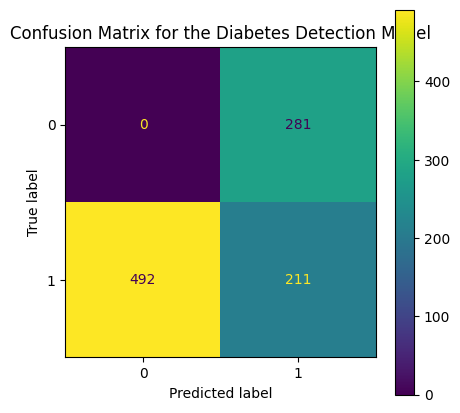

In [ ]:
conf_matrix(km_pred, y,lr_model)

### classification of report

In [ ]:
print(classification_report(y, km_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       492
           1       0.30      0.43      0.35       492

    accuracy                           0.21       984
   macro avg       0.15      0.21      0.18       984
weighted avg       0.15      0.21      0.18       984



### explian about evalovate metrics :  


* preciosion:

  * Non-counterfeit cards:

    0% means that 0% of the cards it has identified as non-fraudulent cards were correct.

  * Counterfeit cards:

    30% means that 30% of the cards it has detected as fake cards were correct.


* recall :
  * Non-counterfeit cards:

    0% means this. It correctly recognized all non-counterfeit cards that were in Dagan's collection.

  * Counterfeit cards:

    It is 43 percent. It correctly recognized 43% of the fake cards that were in the database.


Now, both qualities are the same here, and for the purpose of the system, for this reason, we use f1-score quality, which is equal to 21% here.

# accuracy for 3 models

## see tabels

In [ ]:
acc_model = {
    "logsstic regression" : accuracy_lr * 100,
    "support vector machine" : accuracy_svm * 100,
    "K-means" : accuracy_km * 100
}

pd.DataFrame(acc_model, index=[0])

,logsstic regression,support vector machine,K-means
0,97.969543,98.984772,21.443089


## see plot of this

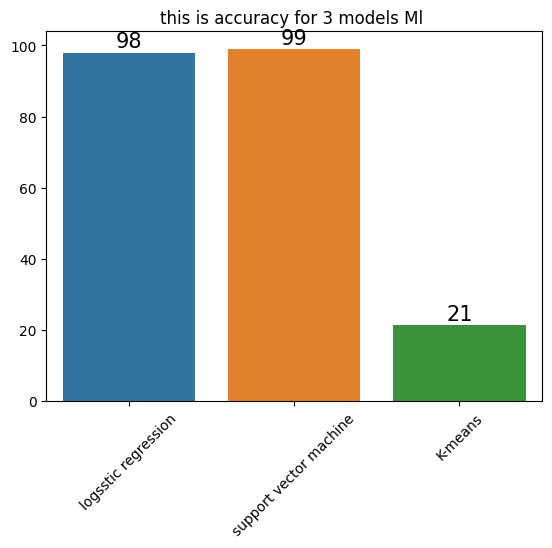

In [ ]:
plot_for_each_vec(acc_model, "this is accuracy for 3 models Ml ")

# save models


In [ ]:
joblib.dump(lr_model, f'lr_model.pkl')
joblib.dump(svm_model, f'svm_model.pkl')
joblib.dump(km_model, f'km_model.pkl')

print("all models saved")

all models saved
